# Evaluate the system

Overview:

1. We have a list of recipes and an generated list of tools known as "system output"
2. Human annotaters agree on a list of tools known as "answer key"
3. For the two lists, compare the results
4. For each recipe, we have a precision, recall, f-1 score

In [1]:
import pandas as pd

In [17]:
#open file
def open_file(filename):
    output = {}
    new_recipe = 1
    number = -1
    tools = []

    with open (filename) as f:
        lines = f.readlines()
        for line in lines:

            if line in ['\n','\r\n']:
                output[number] = tools
                new_recipe = 1
                tools = []
                continue

            if new_recipe == 1:
                stuff = line.split('\t')
                print(stuff)
                number = stuff[0]
                title = stuff[1]
                new_recipe = 0

            else:
                tools.append(line.strip())
    
    return output

In [18]:
# parse lists from txt file
# assume the txt is this format: first line: # and title of recipe, then each tool on each line, then empty line
outputs = open_file('sys_output.txt')
answers = open_file('answer_keys.txt')           

['51', 'Creamy Au Gratin Potatoes\n']
['52', 'Garlic Chicken\n']
['53', 'Grilled Salmon I\n']
['54', 'Buffalo Chicken Dip\n']
['55', 'Salsa Chicken\n']
['56', 'Quick and Easy Alfredo Sauce\n']
['57', 'Chewy Chocolate Chip Oatmeal Cookies\n']
['58', 'Chicken Marsala\n']
['59', 'Slow-Cooker Chicken Tortilla Soup\n']
['60', 'Creamy Rice Pudding\n']
['61', 'Banana Sour Cream Bread\n']
['62', 'Quinoa and Black Beans\n']
['63', 'Easy Meatloaf\n']
['64', "Annie's Fruit Salsa and Cinnamon Chips\n"]
['65', 'Chicken Enchiladas II\n']
['66', 'Slow Cooker Pulled Pork\n']
['67', 'Cream Cheese Frosting II\n']
['68', "Beth's Spicy Oatmeal Raisin Cookies\n"]
['69', 'Maple Salmon\n']
['70', 'Slow Cooker Beef Stew I\n']
['71', "Brooke's Best Bombshell Brownies\n"]
['72', 'Fluffy French Toast\n']
['73', 'Slow Cooker Beef Stroganoff I\n']
['74', 'Soft Oatmeal Cookies\n']
['75', 'Roast Sticky Chicken-Rotisserie Style\n']
['76', 'Salisbury Steak\n']
['77', 'Braised Balsamic Chicken\n']
['78', "Jamie's Cranb

In [19]:
outputs

{'51': ['oven', 'saucepan', 'seconds'],
 '52': ['oven', 'saucepan', 'bowl', 'instant-read'],
 '53': ['bowl', 'grate'],
 '54': ['skillet', 'cooker'],
 '55': ['oven', 'Place'],
 '56': ['saucepan'],
 '57': ['wire', 'oven'],
 '58': ['bowl', 'salt;', 'spoonfuls', 'oven', 'wire', 'skillet'],
 '59': ['cooker', 'oven'],
 '60': ['saucepan', 'raisins;'],
 '61': ['oven', 'bowl'],
 '62': ['saucepan', 'heat;', 'minutes;'],
 '63': ['oven', 'bowl'],
 '64': ['bowl', 'oven', 'Repeat'],
 '65': ['oven', 'saucepan', 'Reserve', '3/4', 'bowl'],
 '66': ['cooker'],
 '67': ['bowl', "confectioners'", 'Store'],
 '68': ['oven', 'bowl', 'salt;', 'teaspoonfuls', 'Store', 'long!'],
 '69': ['bowl', 'oven'],
 '70': ['cooker', 'bowl', 'pepper;'],
 '71': ['oven', 'bowl'],
 '72': ['bowl', 'oven', 'wire', 'Measure', 'griddle'],
 '73': ['cooker'],
 '74': ['bowl', 'cinnamon;', 'oven', 'wire'],
 '75': ['bowl', 'towel', 'cavity', 'oven'],
 '76': ['bowl', 'skillet'],
 '77': ['skillet', 'heat;', 'instant-read'],
 '78': ['saucep

In [20]:
answers

{'51': ['oven', 'saucepan', 'whisk', 'aluminum foil'],
 '52': ['oven',
  'saucepan',
  'shallow bowl',
  'tong',
  'baking dish',
  'instant-read thermometer'],
 '53': ['bowl', 'resealable plastic bag', 'grill', 'fork'],
 '54': ['skillet', 'slow cooker'],
 '55': ['oven', 'baking dish'],
 '56': ['saucepan'],
 '57': ['oven', 'bowl', 'baking sheet', 'wire rack'],
 '58': ['bowl', 'skillet', 'pan'],
 '59': ['slow cooker', 'oven', 'baking sheet'],
 '60': ['saucepan'],
 '61': ['oven', 'loaf pan', 'bowl'],
 '62': ['saucepan'],
 '63': ['oven', 'bowl', 'loaf pan', 'baking dish'],
 '64': ['bowl', 'oven', 'baking sheet'],
 '65': ['oven', 'baking dish', 'saucepan', 'bowl'],
 '66': ['slow cooker'],
 '67': ['bowl'],
 '68': ['oven', 'bowl', 'cookie sheet', 'airtight container'],
 '69': ['bowl', 'glass baking dish', 'oven'],
 '70': ['slow cooker', 'bowl'],
 '71': ['oven', 'baking dish', 'bowl', 'wire rack'],
 '72': ['mixing bowl', 'griddle', 'frying pan'],
 '73': ['slow cooker'],
 '74': ['bowl', 'oven'

In [21]:
num_of_recipes = len(outputs)

# analysis
* precision = correct / length (system output)
* recall = correct / length (answer key)
* F-measure = 2 / (1/precision + 1/recall)

In [22]:
analysis = pd.DataFrame(columns = ["number","precision", "recall", "f-measure"])

In [23]:
for key in outputs:
    num = key
    print(num)
    output = outputs[num]
    answer = answers[num]
    correct = 0
    length_output = len(output)
    length_answer = len(answer)
    
    for i in output:
        for j in answer:
            if j.find(i) != -1:
                correct += 1
    
    precision = correct/length_output
    recall = correct/length_answer
    f_measure = 2 / (1/precision + 1/recall)
    
    analysis = analysis.append({'number': num, "precision":precision, "recall":recall, "f-measure":f_measure}, ignore_index = True)

51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79


In [24]:
analysis

,number,precision,recall,f-measure
0,51,0.666667,0.500000,0.571429
1,52,1.000000,0.666667,0.800000
2,53,0.500000,0.250000,0.333333
3,54,1.000000,1.000000,1.000000
4,55,0.500000,0.500000,0.500000
5,56,1.000000,1.000000,1.000000
6,57,1.000000,0.500000,0.666667
7,58,0.333333,0.666667,0.444444
8,59,1.000000,0.666667,0.800000
9,60,0.500000,1.000000,0.666667


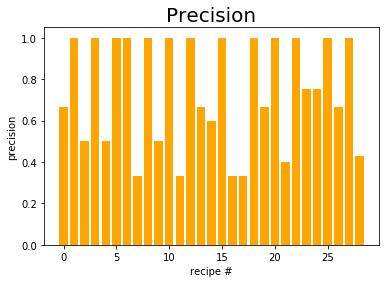

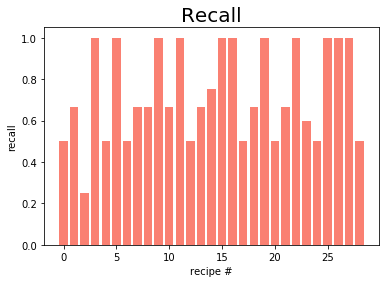

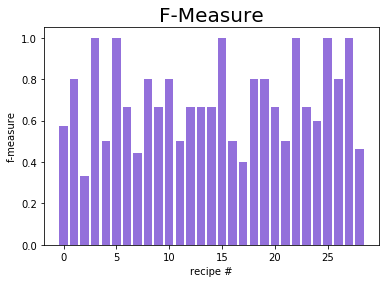

<Figure size 432x288 with 0 Axes>

In [80]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = [int(i)-50 for i in analysis["number"]]
p = analysis["precision"]
r = analysis["recall"]
f = analysis['f-measure']

x = np.arange(len(labels))  # the label locations
width = 0.8  # the width of the bars

fig, ax1 = plt.subplots()
fig, ax2 = plt.subplots()
fig, ax3 = plt.subplots()
rects1 = ax1.bar(x, p, width, label='precision',color='orange')
rects2 = ax2.bar(x, r, width, label='recall',color='salmon')
rects3 = ax3.bar(x, f, width, label='f-measure',color='mediumpurple')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('precision')
ax1.set_xlabel('recipe #')
ax1.set_title('Precision',fontsize = 20)

ax2.set_ylabel('recall')
ax2.set_xlabel('recipe #')
ax2.set_title('Recall',fontsize = 20)

ax3.set_ylabel('f-measure')
ax3.set_xlabel('recipe #')
ax3.set_title('F-Measure',fontsize = 20)






plt.show()
plt.savefig('result.png')